In [29]:
from sriApp.modelos.boolean_model import BooleanModel
from sriApp.modelos.boolean_model import DIR
from ir_datasets import load
from sriApp.modelos.SortedValueDataSet import normalize
import matplotlib.pyplot as plt
import statistics as stat
from medidas import *
import time

In [2]:
datasets = {
    "beir/arguana": {'count': 8674},
    #"beir/dbpedia-entity": {'count': 4635922},
    "beir/fiqa": {'count': 57638},
    "beir/cqadupstack/android": {'count': 22998},
    "beir/cqadupstack/english": {'count': 40221},
    "beir/cqadupstack/gaming": {'count': 45301},
    "beir/cqadupstack/gis": {'count': 37637},
    "beir/cqadupstack/mathematica": {'count': 16705},
    "beir/cqadupstack/physics": {'count': 38316},
    "beir/cqadupstack/programmers": {'count': 32176},
    "beir/cqadupstack/stats": {'count': 42269},
    "beir/cqadupstack/tex": {'count': 68184},
    "beir/cqadupstack/unix": {'count': 47382},
    "beir/cqadupstack/webmasters": {'count': 17405},
    "beir/cqadupstack/wordpress": {'count': 48605},
    "cranfield":{'count': 0},
}

In [3]:
dataset_name = "cranfield"
boolean_model = BooleanModel(dataset_name)

CARGADO Modelo Booleano


In [4]:
def normalize_bool_querie(querie):
    tokens = list(normalize(querie))
    if len(tokens) == 0:
        return 'i', 'i'
    querie_and = tokens[0]
    querie_or = tokens[0]
    for token in tokens[1:]:
        querie_and += ' & ' + token
        querie_or += ' | ' + token
    return querie_and, querie_or

In [15]:
dataset = load(dataset_name)
queries_and = []
queries_or = []
index = 1
for querie in dataset.queries_iter():
    querie_and, querie_or = normalize_bool_querie(querie.text)
    queries_and.append((querie_and, index))
    queries_or.append((querie_or, index))
    index+=1

In [36]:
responses_and = {}
times = []
for q in queries_and:
    inicio = time.time()
    responses_and[int(q[1])] = boolean_model.SearchIndex(q[0])
    fin = time.time()
    times.append(fin-inicio)
print(stat.mean(times))

0.0006867302788628472


In [17]:
responses_or = {}
for q in queries_or:
    responses_or[int(q[1])] = boolean_model.SearchIndex(q[0])

In [18]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    s = new_qrels.get(qrel.query_id, set())
    s.add(int(qrel.doc_id))
    new_qrels[qrel.query_id] = s

In [19]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    if qrel.relevance > 0:
        s = new_qrels.get(int(qrel.query_id), set())
        s.add(int(qrel.doc_id))
        new_qrels[int(qrel.query_id)] = s

In [21]:
m_or    = get_medidas(responses_or, new_qrels)
m_and    = get_medidas(responses_and, new_qrels)

In [23]:
r_or, a_or = get_recall_accuracy(m_or)
r_and, a_and = get_recall_accuracy(m_and)

0.8259306009894245 0.007496246009807474


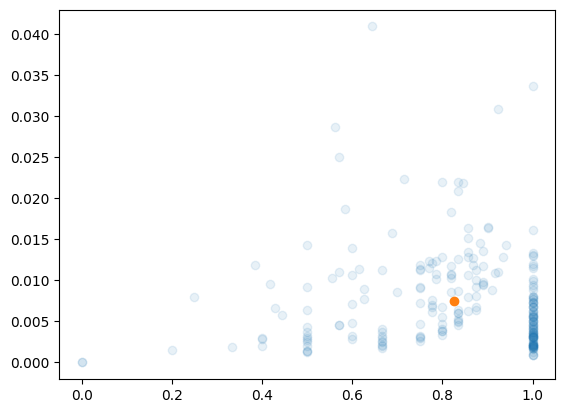

In [24]:
plot_recall_accuracy(r_or,a_or)

0.004955908289241622 0.013777777777777778


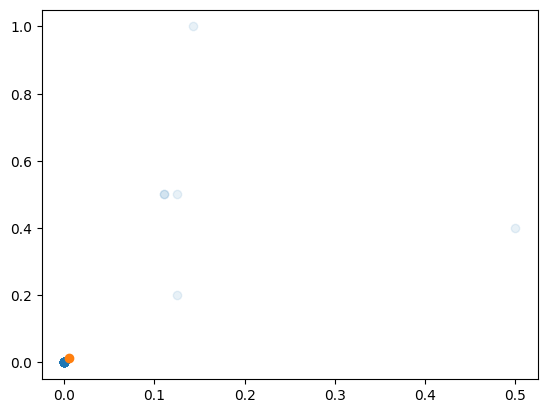

In [25]:
plot_recall_accuracy(r_and,a_and)

0.8259306009894245 0.007496246009807474
0.004955908289241622 0.013777777777777778


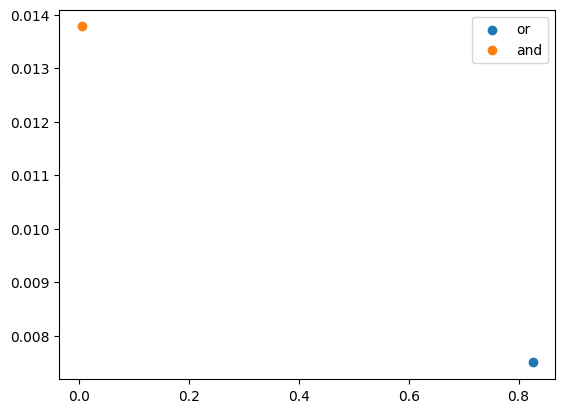

In [27]:
medidas = [
    (r_or, a_or),
    (r_and, a_and),
]
names= ['or', 'and']
plot_means(medidas, names)